<a href="https://colab.research.google.com/github/Eazaz001/Matchine_Learning_Cyber_Treat2/blob/main/updated_cyber_attack_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install nltk
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install imbalanced-learn
!pip install xgboost
!pip install shap

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

Saving cybersecurity_attacks.csv to cybersecurity_attacks.csv


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for cleaning and lemmatizing text
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_payload'] = df['Payload Data'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [5]:
import nltk

# Download necessary NLTK datasets (fixing the issue)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for cleaning and lemmatizing text
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_payload'] = df['Payload Data'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [7]:
!pip install nltk
import nltk

# Download the necessary NLTK data package
nltk.download('punkt_tab')

# Existing imports and code...
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for cleaning and lemmatizing text
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_payload'] = df['Payload Data'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for cleaning and lemmatizing text
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_payload'] = df['Payload Data'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_payload']).toarray()
y = df['Action Taken'].map({'Logged': 0, 'Blocked': 1, 'Ignored': 2})

In [10]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [12]:
# Step 8: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
model = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'solver': 'saga'}


In [13]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.3252032520325203
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.30      0.32      2745
           1       0.33      0.34      0.33      2703
           2       0.32      0.34      0.33      2670

    accuracy                           0.33      8118
   macro avg       0.33      0.33      0.33      8118
weighted avg       0.33      0.33      0.33      8118



In [15]:
# Step 11: ROC-AUC Curve
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ValueError: multi_class must be in ('ovo', 'ovr')

In [16]:
# Step 11: ROC-AUC Curve
y_prob = model.predict_proba(X_test)

# Assuming 'y_test' has labels 0, 1, 2
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # or 'ovo'

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.4980211183305891


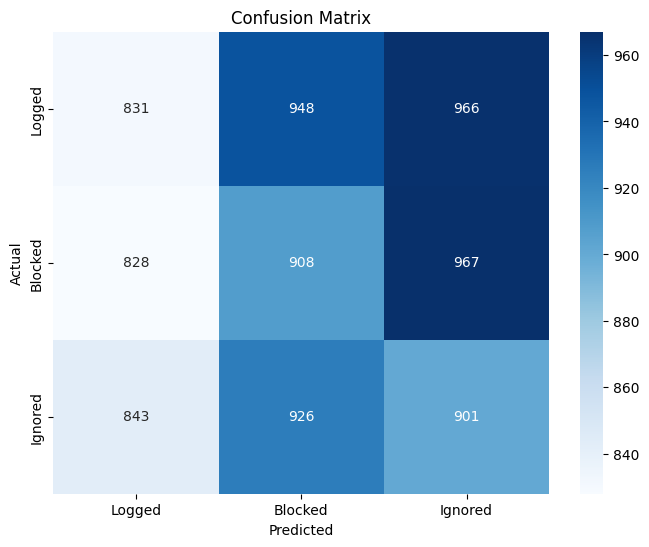

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Logged', 'Blocked', 'Ignored'], yticklabels=['Logged', 'Blocked', 'Ignored'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

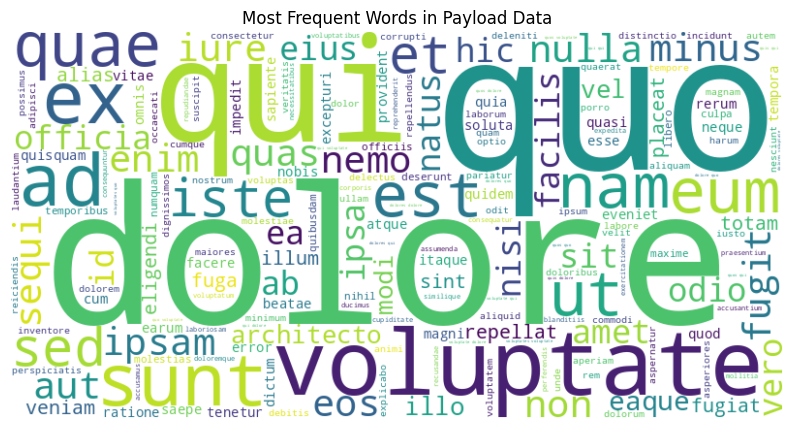

In [18]:
# Step 13: Word Cloud Visualization
text_data = ' '.join(df['cleaned_payload'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Payload Data")
plt.show()

In [19]:
# Step 14: Save the model and vectorizer
import joblib
joblib.dump(model, 'cyber_attack_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# To load the model later:
# model = joblib.load('cyber_attack_model.pkl')
# vectorizer = joblib.load('tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob are defined after training the model
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])  # For binary classification
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # Save the image


NameError: name 'y_pred_prob' is not defined

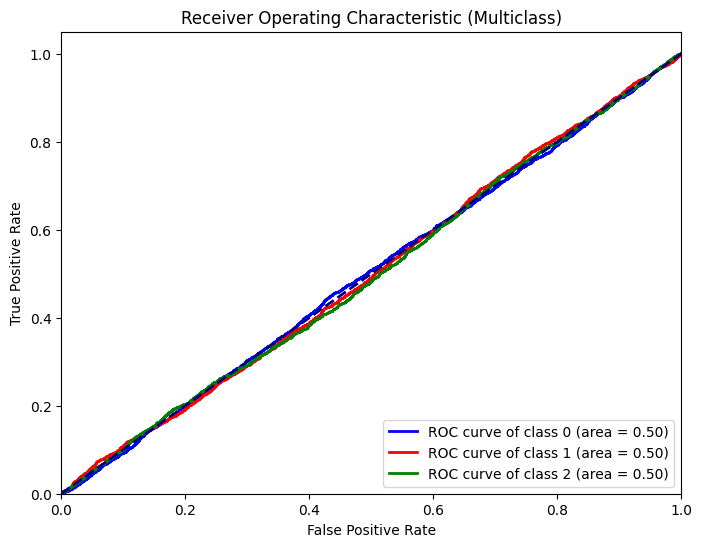

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate y_pred_prob
y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities

# ROC Curve for Multiclass Classification (One-vs-Rest)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred_prob.shape[1]  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC Curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multiclass)')
plt.legend(loc='lower right')
plt.savefig('roc_curve_multiclass.png')  # Save the image
plt.show()

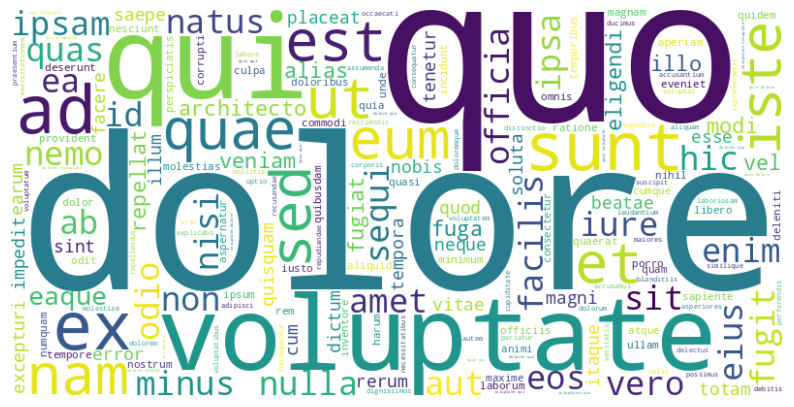

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `text_data` is the cleaned text from payload
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Displaying the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')  # Save the word cloud image
